# Data Analysis

After extracting and cleaning the data, the next step is to visualize it to gain insights and communicate findings effectively. But before starting, let's recap the different columns that we have :

- `region`, `country`, `city`, `airport_id` : the location to where we're travelling (from Casablanca)
- `departure_tod`, `arrival_tod` : departure/arrival time of the day (Night, Morning,...)
- `stops` : number of stops the plane does
- `duration_s_` : flight duration by seconds
- `coastline` : coast length / area ratio
- `gdp` : GDP per capita 
- `migration`, `infant_mortality` : net migration and infant mortality rate
- `population`, `pop_density`, `area` : destination population, its density and area
- `birthrate`, `deathrate` : the birth/death rate in the destination's country
- `distance` : areal distance between Casablanca and the destination
- `departure_time`, `arrival_time`, `duration`, `airline`, `price` : are self explanatory

Let's start by exploring the different features :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("colorblind")

In [4]:
df = pd.read_csv("DATA.csv")

### I. Destinations

We have 651 destination around the world.


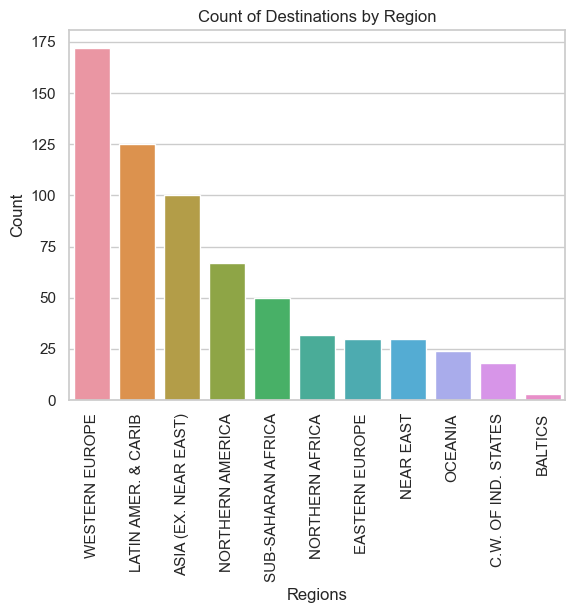

In [5]:
# Let's see how many destinations we have, and how they are distibuted around the world
destinations = df[['region', 'country', 'city']].drop_duplicates()

print(f'We have {len(destinations)} destination around the world.')

ax = sns.countplot(data=destinations,
                   x='region',
                   order=destinations['region'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Count of Destinations by Region')

plt.show()

The majority of the destinations are located in the western Europe, which is obvious due to the high traffic between Morocco and European nations (especially France and Spain). The Baltic region has the least number of destinations and that's because it's only 3 countries (Latvia, Lithuania and Estonia). Now let's how far are our destinations.

The closest destination is Rabat, Morocco by 86.05 Km.
The farest destination is Auckland, New Zealand by 19593.31 Km.


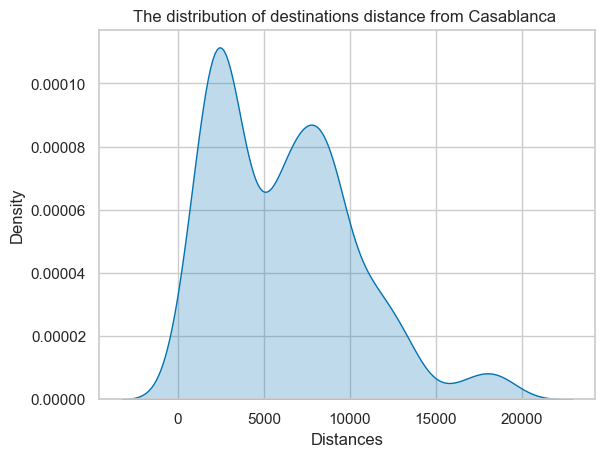

In [6]:
distances = df[['city', 'country', 'distance']].drop_duplicates()

close_city, close_country, how_close = distances.loc[distances['distance'].idxmin()].values
farest_city, farest_country, how_far = distances.loc[distances['distance'].idxmax()].values

print(f'The closest destination is {", ".join([close_city, close_country])} by {how_close} Km.')
print(f'The farest destination is {", ".join([farest_city, farest_country])} by {how_far} Km.')

sns.kdeplot(data=distances,
            x='distance',
            fill=True)

plt.xlabel('Distances')
plt.title('The distribution of destinations distance from Casablanca ')

plt.show()

### II. Time

The longest flight is to Christchurch, New Zealand during 2 days 15:35:00.
The shortest flight is to Málaga, Spain during 0 days 00:15:00.


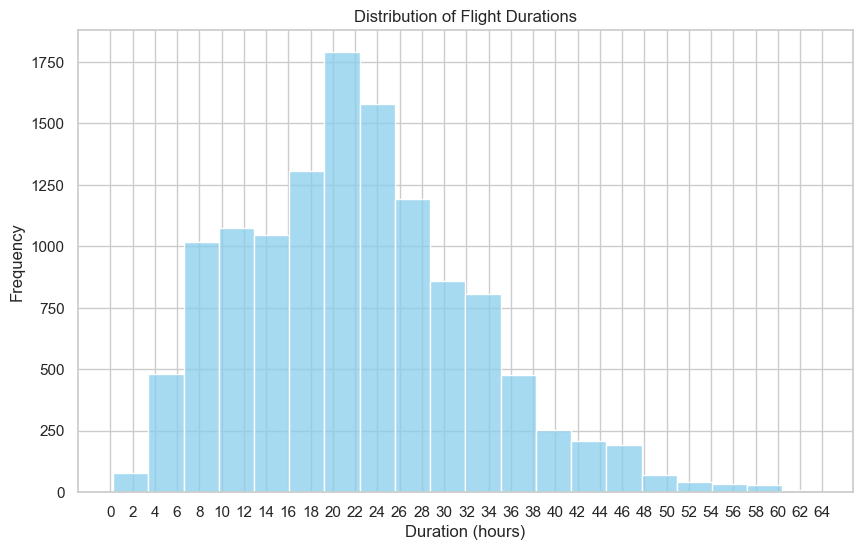

In [17]:
# Find the row with the shortest duration
shortest = df.loc[df['duration_s_'].idxmin()]

# Find the row with the longest duration
longest = df.loc[df['duration_s_'].idxmax()]

print(f'The longest flight is to {longest["city"]}, {longest["country"]} during {longest["duration"]}.')
print(f'The shortest flight is to {shortest["city"]}, {shortest["country"]} during {shortest["duration"]}.')

# Convert flight durations from seconds to hours
df['duration_hours'] = df['duration_s_'] / 3600.0

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot a histogram of flight durations in hours
sns.histplot(df['duration_hours'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Flight Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')

# Set x-axis ticks and labels to represent hours
hours = range(0, int(df['duration_hours'].max()) + 2, 2)
plt.xticks(hours)

# Show the plot
plt.show()

Weirdly the closest distination (Rabat) isn't the shortest in term of duration, after inspecting I found that there isn't a direct flight from Casablanca to Rabat and that's usually due to the short distance (86 Km) and to the availability of trains with low prices.

The duration of flights are too long the majority and its obviously due the the hight number of stops. Small cities (Grenoble, France for example) usually do not receive flights from foreign airports, instead aiplanes must stop in bigger cities (Paris in this case) before heading toward its final destination. The following plot proves that the majority of destinations require several stops either for being too far or for being small cities as we discussed erlier.

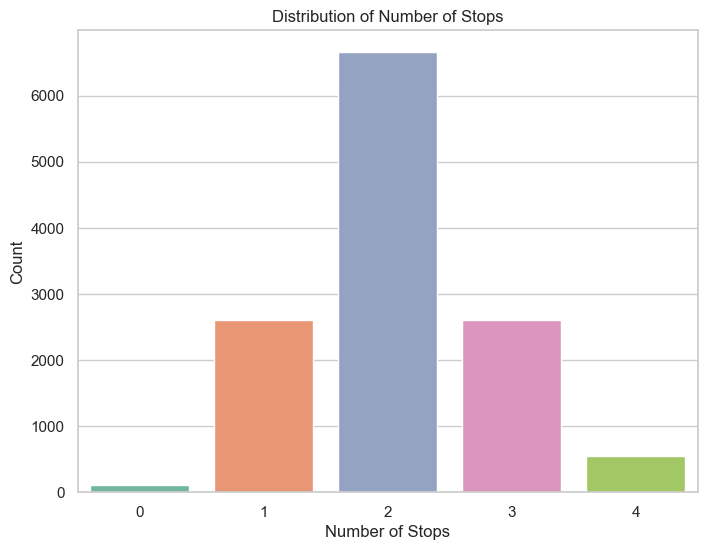

In [23]:
# Convert 'stops' column to integers
df['stops'] = df['stops'].astype(int)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot a count plot of the number of stops
sns.countplot(data=df, x='stops', palette='Set2')
plt.title('Distribution of Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Count')

# Show the plot
plt.show()

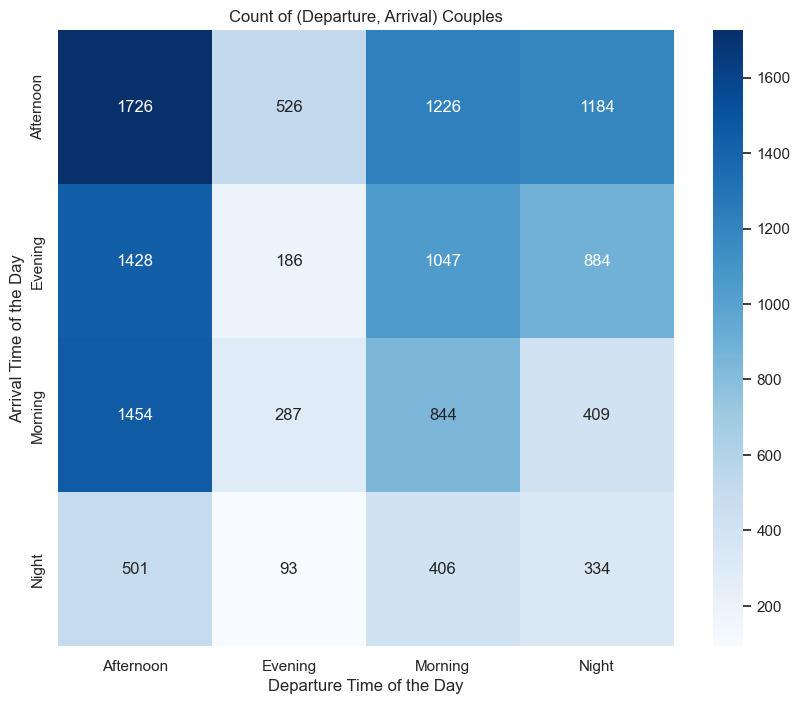

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a pivot table with counts of (departure_tod, arrival_tod) couples
pivot_df = df.pivot_table(index='arrival_tod', columns='departure_tod', aggfunc='size', fill_value=0)

# Plot the heatmap
sns.heatmap(pivot_df, cmap='Blues', annot=True, fmt='d', cbar=True, square=True)

# Set labels and title
plt.title('Count of (Departure, Arrival) Couples')
plt.xlabel('Departure Time of the Day')
plt.ylabel('Arrival Time of the Day')

# Show the plot
plt.show()

### III. Price

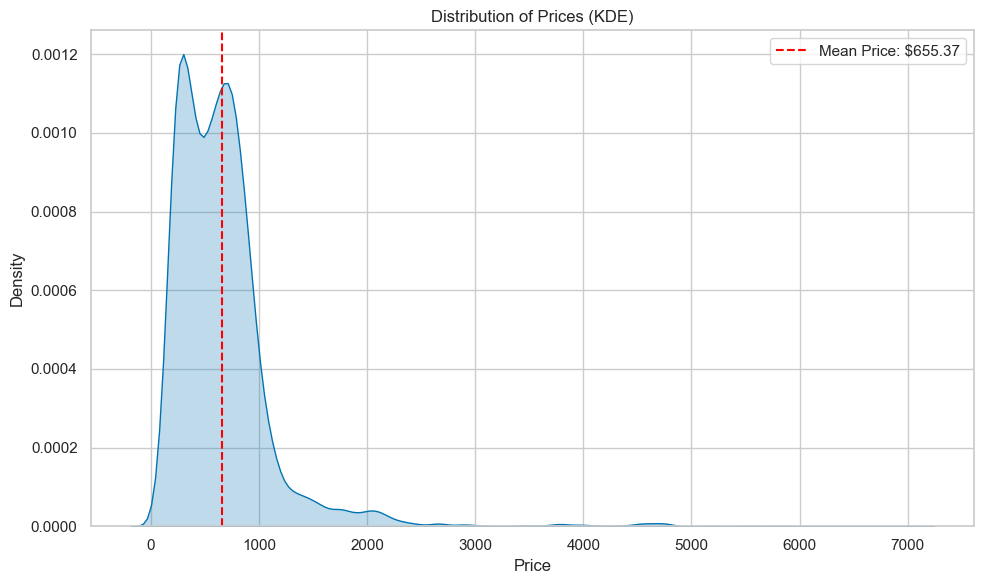

In [38]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot KDE plot of prices
sns.kdeplot(df['price'], fill=True)
plt.title('Distribution of Prices (KDE)')
plt.xlabel('Price')
plt.ylabel('Density')

# Calculate mean price
mean_price = df['price'].mean()

# Add vertical line for the mean price
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean Price: ${mean_price:.2f}')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The majority of flight prices are between 0 and 1000€ with an average of 655€. Few cases that surpass 3000€ ! Let's see the price variation with other features.

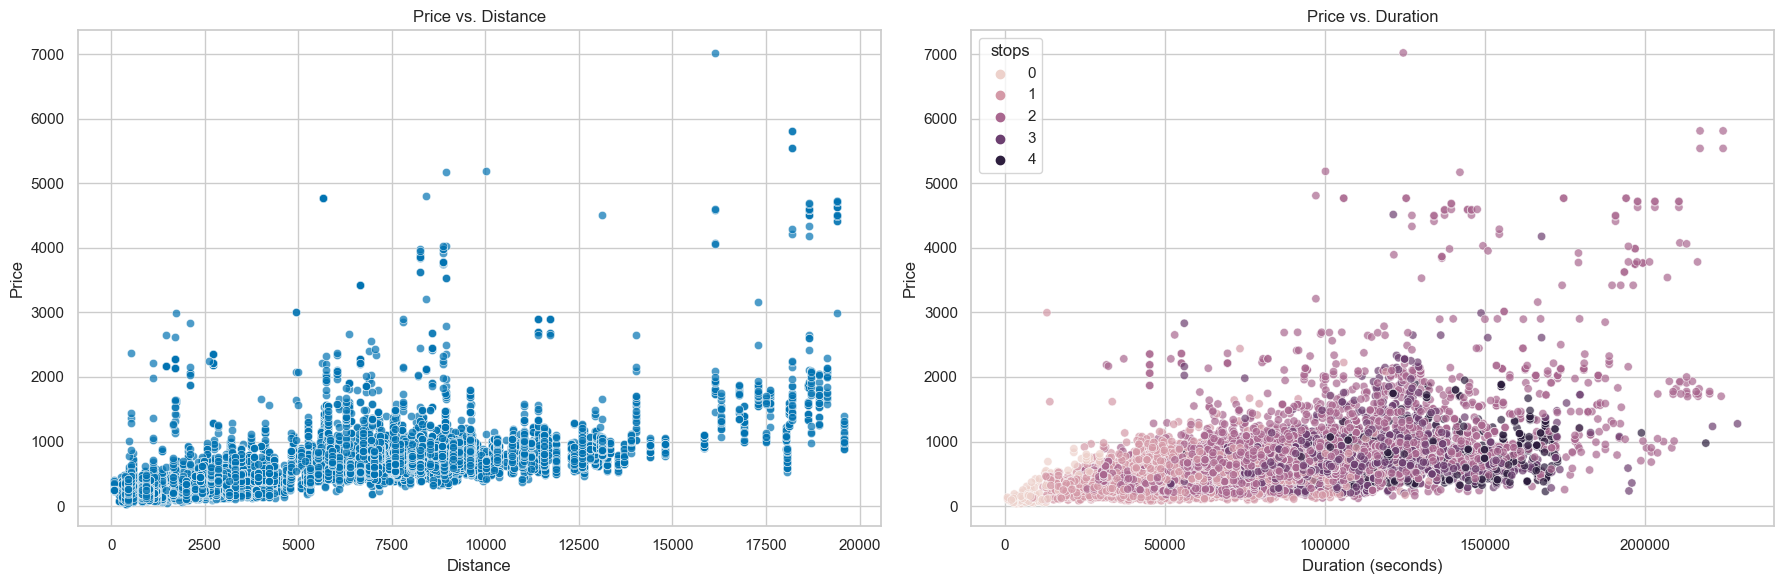

In [34]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Plot 1: Scatter plot of price vs. distance
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='distance', y='price', alpha=0.7)
plt.title('Price vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Price')

# Plot 2: Scatter plot of price vs. duration
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='duration_s_', y='price', hue='stops', alpha=0.7)
plt.title('Price vs. Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Observing these plots we can get the following insights :
-   Increasing the distance does increase the price slightly, but it's not that impactful, as there are some short destination that are more expensive than some farest places.
-   Longest flights in term of duration have generally higher prices and higher number of stops.

Let's see now what is the most expensive airline in our data.

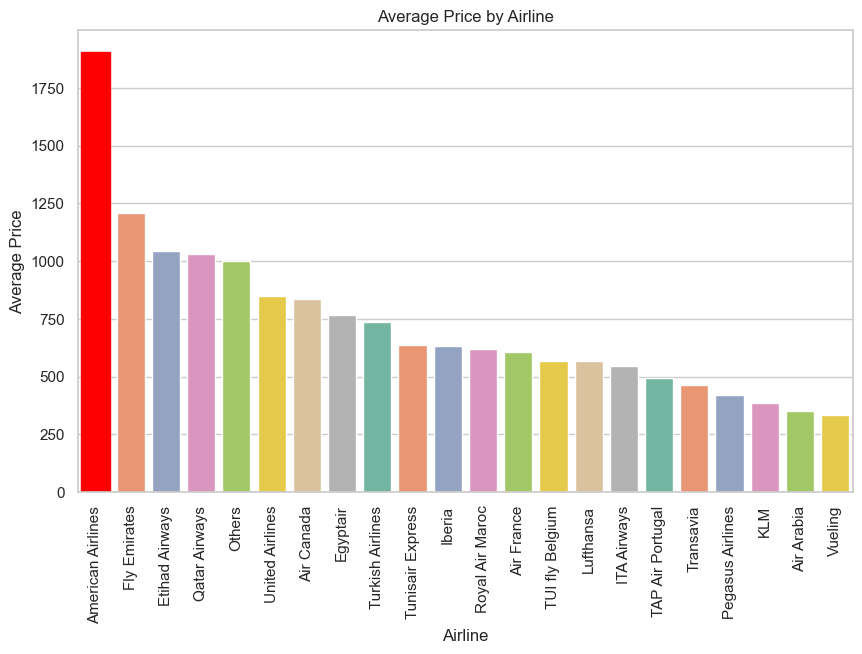

In [36]:
# Calculate the average price for each airline
average_prices = df.groupby('airline')['price'].mean().sort_values(ascending=False)

# Get the name of the most expensive airline
most_expensive_airline = average_prices.idxmax()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot of average prices by airline
sns.barplot(x=average_prices.index, y=average_prices.values, palette='Set2')

# Highlight the bar for the most expensive airline
most_expensive_index = average_prices.index.get_loc(most_expensive_airline)
plt.gca().get_children()[most_expensive_index].set_color('red')

plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

# Show the plot
plt.show()

By far, the American Airlines are the most expensive airline with an average price of more than 1850€ which is nearly the double of the average price in our data (655€).